In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *

In [2]:
XCr_path

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_04_2025P/examples/../'

In [3]:
xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump.yaml')
xcr.convr
xcr.omega0


9831.0

In [4]:

def single_realization_with_data(delta_theta, omega):
 
    xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump.yaml')
    xcr.configure(delta_theta,0)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(15e-6,xcr.omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 1841/1841 [00:11<00:00, 154.54it/s]

Photon energy (omega):  9831.0 ; Reflectivity:  0.5046075707109131 ; Transmission:  0.3980155067438416


In [6]:
xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump.yaml')
xcr.configure(15e-6,xcr.omega0)

In [7]:
kmax=U1_xyz.shape[3]

In [8]:
logh1=((xcr.Xx-xcr.separation1-xcr.xs) >= (-xcr.HH)) * ((xcr.Xx-xcr.separation1-xcr.xs) <=(xcr.HH ))
logh2=((xcr.Xx-xcr.separation1-xcr.xs) >= (-xcr.HH*0.95 )) * ((xcr.Xx-xcr.separation1-xcr.xs) <=(xcr.HH*0.95 ))
logh1h2=logh1^logh2

In [9]:
log_hJ=np.zeros((xcr.xgrid,kmax))      
for i in range(xcr.xgrid):
    for k in range(kmax):
        log_hJ[i,k]=logh1h2[i,0]

Text(0, 0.5, 'x ($\\mu$m)')

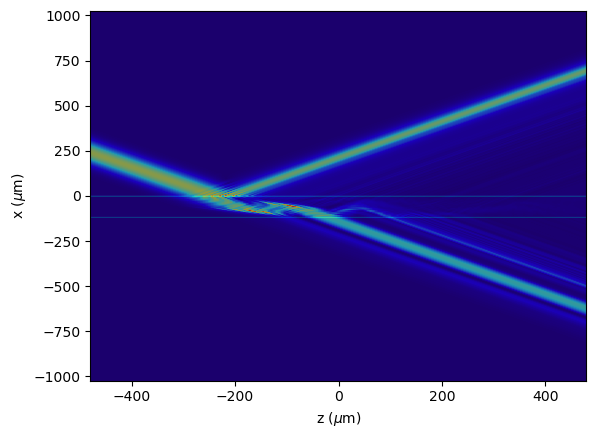

In [10]:
plt.imshow(np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:])**1,extent = [xcr.z[0] /xcr.convr * 1e6,xcr.z[-1] /xcr.convr * 1e6,-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6],cmap='jet', aspect='auto')
plt.imshow(log_hJ,extent = [xcr.z[0] /xcr.convr * 1e6,xcr.z[-1] /xcr.convr * 1e6,-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6], aspect='auto', alpha=0.4)
plt.xlabel(r'z ($\mu$m)')
plt.ylabel(r'x ($\mu$m)')
#plt.xlim(-300, 00)


(-300.0, -100.0)

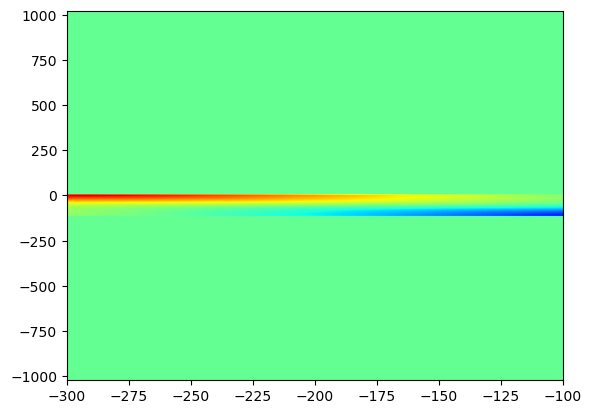

In [11]:
plt.imshow(xcr.u[:,0,:],extent = [xcr.z[0] /xcr.convr * 1e6,xcr.z[-1] /xcr.convr * 1e6,-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6], aspect='auto',cmap='jet')
#plt.ylim(2100, 2400)
plt.xlim(-300, -100)

In [12]:
xcr.u.shape

(4267, 1, 1842)

(2124.0, 2376.0)

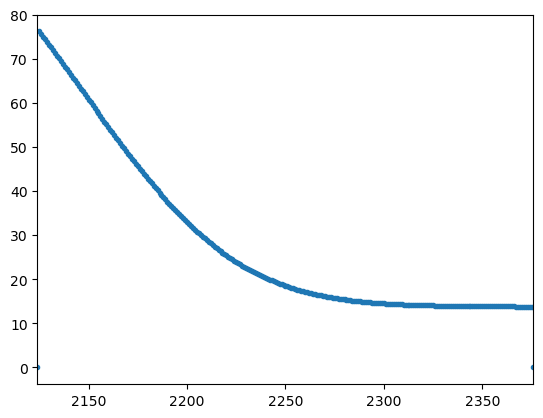

In [13]:
plt.plot(xcr.u[:,0,250],'.')
plt.xlim(2124, 2376)

In [14]:
xmax=120*4267/250/2
xmax

1024.08